# **M√ìDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa √© a primeira etapa do processo de Credit Score que voc√™s desenvolver√£o durante nosso curso.
Nessa primeira etapa voc√™s ir√£o aplicar os passos aprendidos nos m√≥dulos de pr√© processamento para preparar a base de voc√™s para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontua√ß√£o num√©rica que representa a credibilidade de um indiv√≠duo em termos de cumprimento de obriga√ß√µes financeiras, como pagar contas de empr√©stimos, cart√µes de cr√©dito, entre outros. Essa pontua√ß√£o √© calculada com base em diversas informa√ß√µes financeiras e de cr√©dito do indiv√≠duo, como hist√≥rico de pagamentos, n√≠veis de endividamento, tempo de cr√©dito, tipos de cr√©dito utilizados, entre outros.

O objetivo de um modelo de credit score √© prever o risco de um indiv√≠duo se tornar inadimplente com suas obriga√ß√µes financeiras. Em outras palavras, o modelo avalia a probabilidade de um indiv√≠duo n√£o cumprir com os pagamentos de empr√©stimos ou outros compromissos financeiros. Essa previs√£o √© fundamental para institui√ß√µes financeiras, como bancos e credores, na tomada de decis√£o sobre a concess√£o de cr√©dito. Um modelo de credit score eficaz pode ajudar essas institui√ß√µes a avaliar o risco de emprestar dinheiro a um determinado indiv√≠duo e, assim, tomar decis√µes mais informadas sobre a aprova√ß√£o ou nega√ß√£o de cr√©dito, bem como sobre os termos e condi√ß√µes desses empr√©stimos.

**Aten√ß√£o:** Notem que esse projeto √© diferente da base que tenho trabalhado com voc√™s em aula, apesar de se tratar de uma base banc√°ria durante a aula falamos sobre a vari√°vel Churn a ser prevista, nesse caso a previs√£o seria do valor do Score de Cr√©dito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
#Lembrem-se sempre de alterar a importa√ß√£o dos dados de acordo com o diret√≥rio de voc√™s.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

Age  Gender      Income            Education Marital Status  \
0  25.0  Female   50.000,00    Bachelor's Degree         Single   
1  30.0    Male  100.000,00      Master's Degree        Married   
2  35.0  Female   75.000,00            Doctorate        Married   
3  40.0    Male  125.000,00  High School Diploma         Single   
4  45.0  Female  100.000,00    Bachelor's Degree        Married   
5  50.0    Male  150.000,00      Master's Degree        Married   
6  26.0  Female   40.000,00   Associate's Degree         Single   
7  31.0    Male   60.000,00    Bachelor's Degree         Single   
8   NaN  Female   80.000,00      Master's Degree        Married   
9   NaN    Male  105.000,00            Doctorate         Single   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  
5                   0          Owned         High  
6                   0         Rented      Average  
7                   0         Rented      Average  
8                   2          Owned         High  
9                   0          Owned         High

Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Sal√°rio Mensal.

*   **Gender** : G√™nero.

*   **Education** : N√≠vel de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de resid√™ncia, alugada ou pr√≥pria.

*   **Credit Score** : Nossa vari√°vel preditora, o score de cr√©dito dos clientes.


# Etapa 1: Relize os passos que vimos no m√≥dulo 18, de pr√© processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transforma√ß√µes quando necess√°rio.**


## Primeiro, irei traduzir as colunas e as categorias
### Verifica√ß√£o de colunas, dados e transforma√ß√µes necess√°rias. 

In [3]:
# Renomear colunas para portugu√™s
df.rename(columns={
    'Age': 'Idade',
    'Gender': 'Genero',
    'Income': 'Renda',
    'Education': 'Escolaridade',
    'Marital Status': 'Estado_Civil',
    'Number of Children': 'Qtd_Filhos',
    'Home Ownership': 'Residencia',
    'Credit Score': 'Score_Credito'
}, inplace=True)

# Traduzir conte√∫dos categ√≥ricos (exemplo: valores √∫nicos)
categorical_columns = ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']
conteudos_antes = {col: df[col].unique().tolist() for col in categorical_columns}

conteudos_antes


{'Genero': ['Female', 'Male'],
 'Escolaridade': ["Bachelor's Degree",
  "Master's Degree",
  'Doctorate',
  'High School Diploma',
  "Associate's Degree"],
 'Estado_Civil': ['Single', 'Married'],
 'Residencia': ['Rented', 'Owned'],
 'Score_Credito': ['High', 'Average', 'Low']}

In [4]:
# Dicion√°rios de tradu√ß√£o para cada coluna categ√≥rica
traducoes = {
    'Genero': {'Female': 'Feminino', 'Male': 'Masculino'},
    'Escolaridade': {
        "Bachelor's Degree": 'Gradua√ß√£o',
        "Master's Degree": 'Mestrado',
        'Doctorate': 'Doutorado',
        'High School Diploma': 'Ensino M√©dio',
        "Associate's Degree": 'Tecn√≥logo'
    },
    'Estado_Civil': {'Single': 'Solteiro(a)', 'Married': 'Casado(a)'},
    'Residencia': {'Rented': 'Alugada', 'Owned': 'Pr√≥pria'},
    'Score_Credito': {'High': 'Alto', 'Average': 'M√©dio', 'Low': 'Baixo'}
}

# Aplicar tradu√ß√µes
for coluna, mapa in traducoes.items():
    df[coluna] = df[coluna].map(mapa)

# Verificar o resultado ap√≥s as tradu√ß√µes
df.head()


Idade     Genero       Renda  Escolaridade Estado_Civil  Qtd_Filhos  \
0   25.0   Feminino   50.000,00     Gradua√ß√£o  Solteiro(a)           0   
1   30.0  Masculino  100.000,00      Mestrado    Casado(a)           2   
2   35.0   Feminino   75.000,00     Doutorado    Casado(a)           1   
3   40.0  Masculino  125.000,00  Ensino M√©dio  Solteiro(a)           0   
4   45.0   Feminino  100.000,00     Gradua√ß√£o    Casado(a)           3   

  Residencia Score_Credito  
0    Alugada          Alto  
1    Pr√≥pria          Alto  
2    Pr√≥pria          Alto  
3    Pr√≥pria          Alto  
4    Pr√≥pria          Alto

## Verificar os tipos de dados das colunas e valores ausentes

In [6]:
# Verificar os tipos de dados das colunas
tipos_dados = df.dtypes

# Verificar se h√° valores ausentes
valores_nulos = df.isnull().sum()

tipos_dados, valores_nulos

(Idade            float64
 Genero            object
 Renda             object
 Escolaridade      object
 Estado_Civil      object
 Qtd_Filhos         int64
 Residencia        object
 Score_Credito     object
 dtype: object,
 Idade            34
 Genero            0
 Renda             0
 Escolaridade      0
 Estado_Civil      0
 Qtd_Filhos        0
 Residencia        0
 Score_Credito     0
 dtype: int64)

##  Transforma√ß√£o dos tipos de dados:

Renda foi convertida para float.

Os demais tipos est√£o adequados:

Num√©ricos: Idade, Renda, Qtd_Filhos

Categ√≥ricos: Genero, Escolaridade, Estado_Civil, Residencia, Score_Credito

Dados faltantes encontrados:
A coluna Idade possui 34 valores ausentes.

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes fa√ßa o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

###  Preencher os valores ausentes da coluna 'Idade' com a mediana  e verificar novamente se h√° valores ausentes

In [7]:
# Preencher os valores ausentes da coluna 'Idade' com a mediana
mediana_idade = df['Idade'].median()
df['Idade'].fillna(mediana_idade, inplace=True)

# Verificar novamente se h√° valores ausentes
valores_nulos_apos = df.isnull().sum()

valores_nulos_apos

C:\Users\karin\AppData\Local\Temp\ipykernel_17248\1082202164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(mediana_idade, inplace=True)


Idade            0
Genero           0
Renda            0
Escolaridade     0
Estado_Civil     0
Qtd_Filhos       0
Residencia       0
Score_Credito    0
dtype: int64

### 1. Visualizar graficamente os valores ausentes (antes do tratamento)

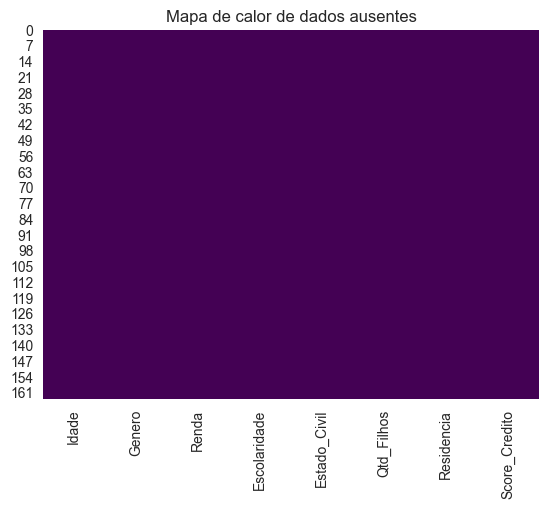

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de dados ausentes")
plt.show()


###  Significado do gr√°fico:
O sns.heatmap(df.isnull()) mostra True em amarelo e False em roxo (por padr√£o no viridis).

Como todos os valores s√£o False (sem nulos), o gr√°fico aparece todo roxo ou rosa, sem destaque.

### Optei por preencher os valores ausentes da vari√°vel Idade utilizando a mediana. Essa abordagem √© adequada pois a mediana √© menos sens√≠vel a outliers e mant√©m a distribui√ß√£o da vari√°vel pr√≥xima do original. Como Idade √© uma vari√°vel num√©rica cont√≠nua, isso garante maior estabilidade para os modelos futuros.

**C) Verifique se temos valores digitados de forma incorreta nas vari√°veis categ√≥ricas que necessitem de tratamento.**

In [9]:
# Verificar os valores √∫nicos nas vari√°veis categ√≥ricas
for coluna in ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']:
    print(f"\nValores √∫nicos em {coluna}:")
    print(df[coluna].unique())


Valores √∫nicos em Genero:
['Feminino' 'Masculino']

Valores √∫nicos em Escolaridade:
['Gradua√ß√£o' 'Mestrado' 'Doutorado' 'Ensino M√©dio' 'Tecn√≥logo']

Valores √∫nicos em Estado_Civil:
['Solteiro(a)' 'Casado(a)']

Valores √∫nicos em Residencia:
['Alugada' 'Pr√≥pria']

Valores √∫nicos em Score_Credito:
['Alto' 'M√©dio' 'Baixo']


#### Resultado:
Nenhum valor inv√°lido foi encontrado. Todos os dados categ√≥ricos est√£o consistentes e padronizados, conforme esperado.

# Etapa 2: Relize os passos que vimos no m√≥dulo 15, de an√°lise.

**A) Realiza a an√°lise univariada, aplique a fun√ß√£o describe ao nosso dataframe para verificar os dados das vari√°veis num√©ricas, se encontrar a poss√≠vel presen√ßa de outliers analise com gr√°ficos a distribui√ß√£o dos dados.Traga insights sobre os dados analisados.**

### Irei realizar Estat√≠sticas descritivas para vari√°veis num√©ricas e Plotar boxplots para visualizar poss√≠veis outliers

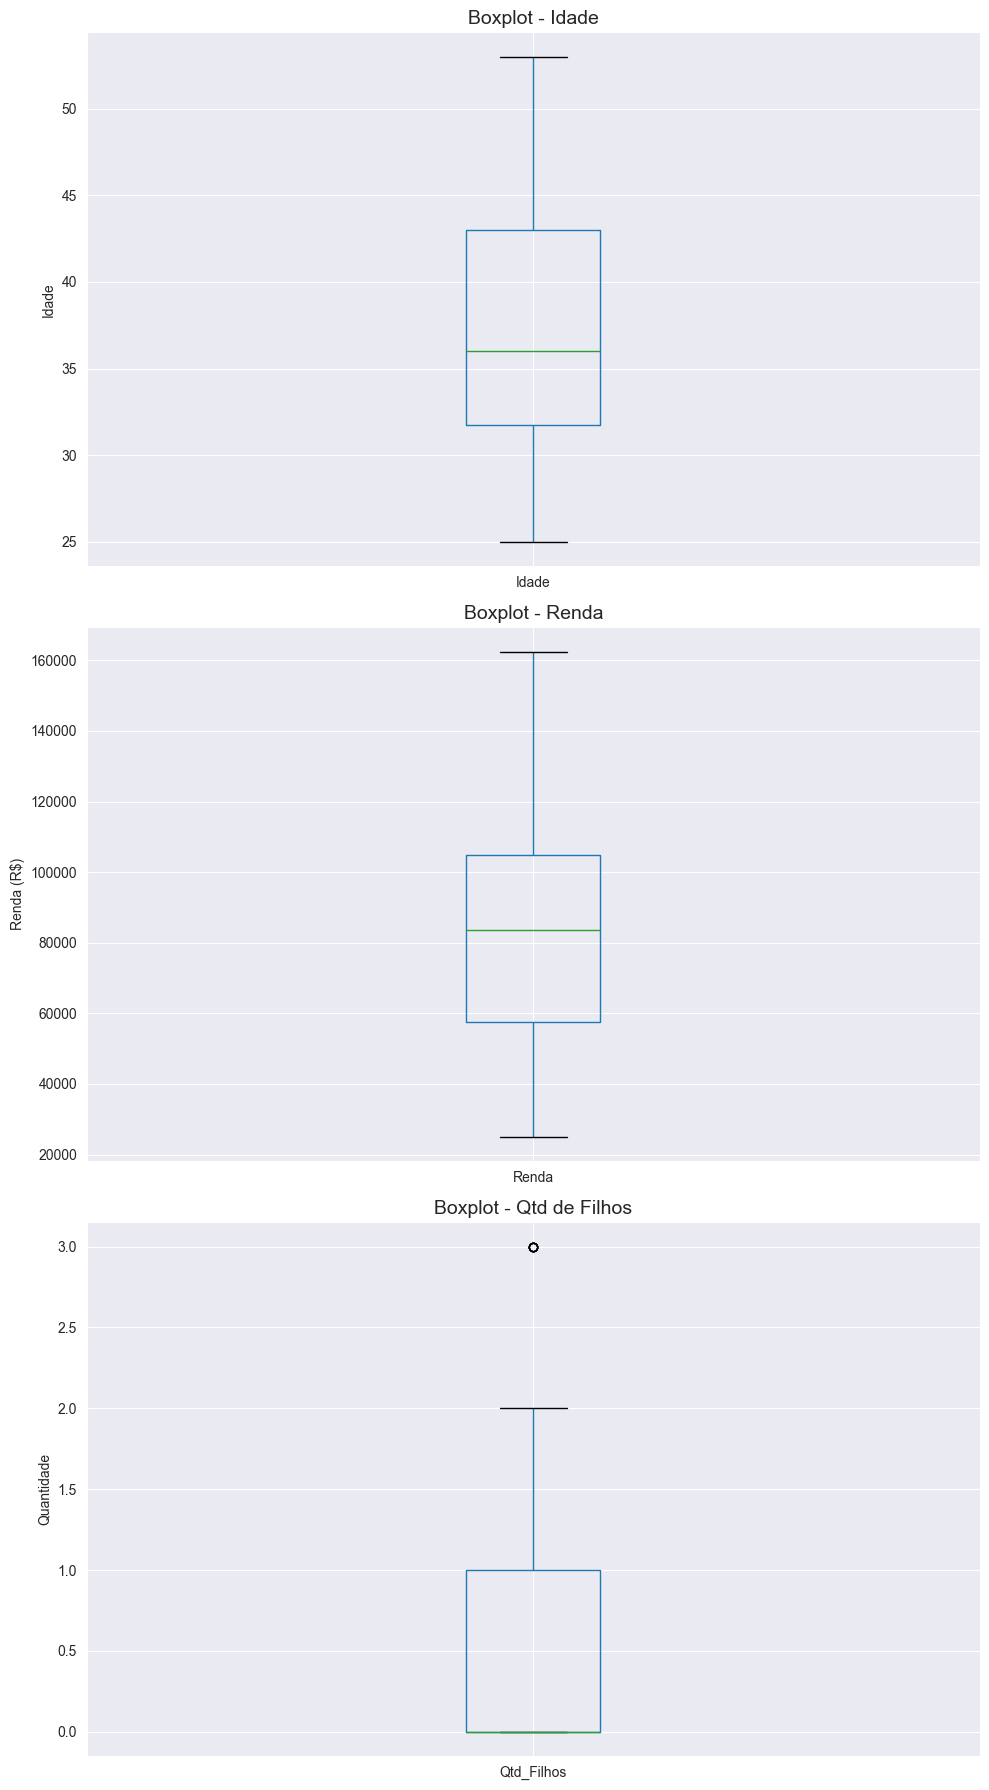

In [12]:
import matplotlib.pyplot as plt

# Criar figura com 3 linhas e 1 coluna (um gr√°fico em cada linha)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Boxplot - Idade
df.boxplot(column='Idade', ax=axes[0])
axes[0].set_title('Boxplot - Idade', fontsize=14)
axes[0].set_ylabel('Idade')

# Boxplot - Renda
df.boxplot(column='Renda', ax=axes[1])
axes[1].set_title('Boxplot - Renda', fontsize=14)
axes[1].set_ylabel('Renda (R$)')

# Boxplot - Qtd de Filhos
df.boxplot(column='Qtd_Filhos', ax=axes[2])
axes[2].set_title('Boxplot - Qtd de Filhos', fontsize=14)
axes[2].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()


### An√°lise Univariada ‚Äì Vari√°veis Num√©ricas
Nesta etapa, foram gerados boxplots para as vari√°veis num√©ricas: Idade, Renda e Qtd_Filhos, com o objetivo de visualizar a distribui√ß√£o dos dados e identificar poss√≠veis outliers.

* Idade: 
A distribui√ß√£o da idade mostra uma leve assimetria √† direita, com poucos valores extremos (outliers) acima de 50 anos. A mediana est√° pr√≥xima dos 35 anos, o que indica que metade dos clientes tem idade inferior a esse valor.

* Renda: 
A vari√°vel de renda apresenta maior variabilidade. Existem valores muito altos que s√£o considerados outliers, mas como se trata de uma vari√°vel econ√¥mica, esses pontos extremos podem refletir clientes com renda muito acima da m√©dia e podem ser mantidos dependendo do contexto do neg√≥cio.

* Qtd_Filhos: 
A quantidade de filhos tem distribui√ß√£o concentrada em 0 e 1 filho, com alguns outliers como 2 ou 3 filhos. Esses valores s√£o esperados e n√£o indicam necessariamente erro nos dados.

**B) Agora realize a an√°lise univariada para as variaveis categ√≥ricas, plote gr√°ficos para entender a distribui√ß√£o das categorias e tente retirar insights de cada gr√°fico.**

### Agora irei fazer a an√°lise univariada e os insights de v√°rias vari√°veis categ√≥ricas. 

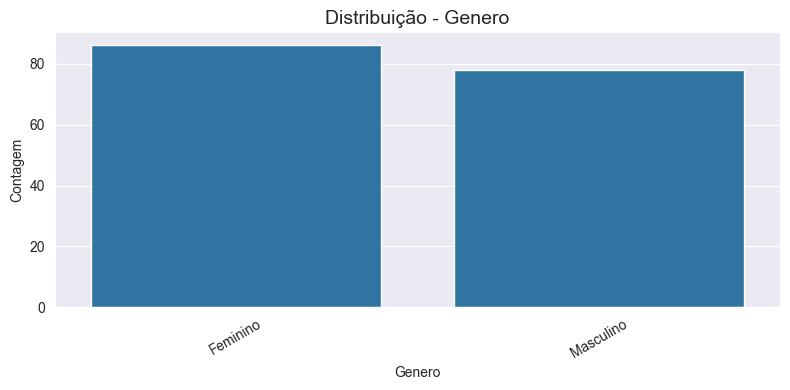

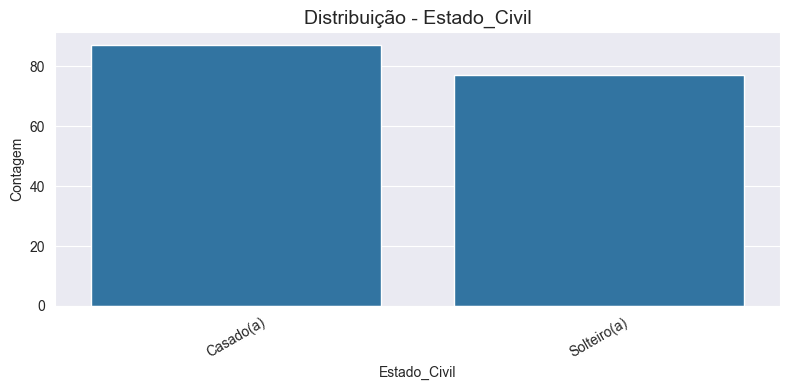

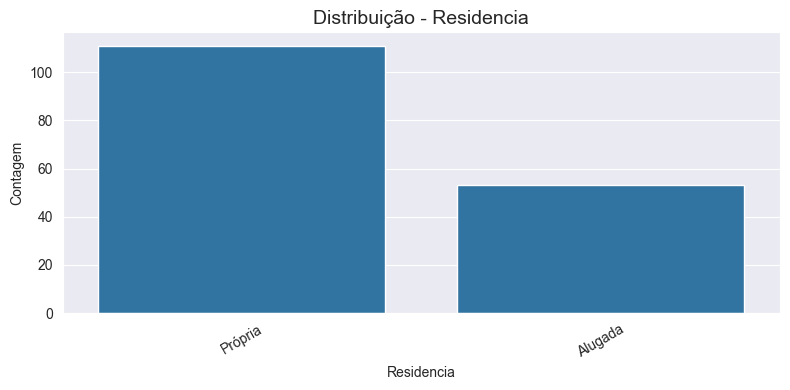

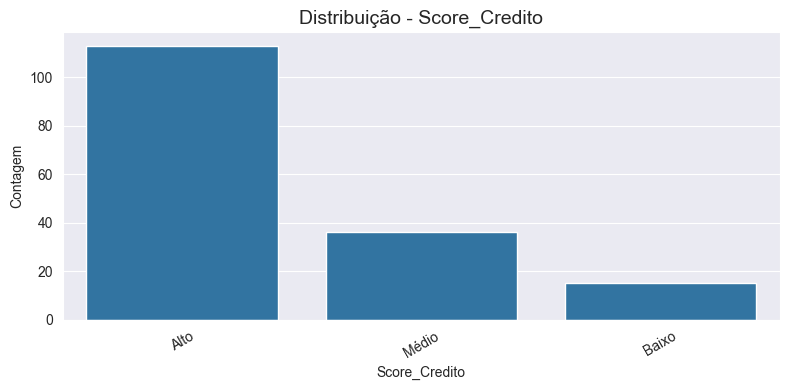

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de vari√°veis categ√≥ricas
categoricas = ['Genero', 'Escolaridade', 'Estado_Civil', 'Residencia', 'Score_Credito']

# Plotar gr√°ficos de barras para cada vari√°vel categ√≥rica
for coluna in categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=coluna, order=df[coluna].value_counts().index)
    plt.title(f'Distribui√ß√£o - {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


**C) Voc√™ encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

#### ‚úîÔ∏è Tratamento de Outliers:
Foi identificada a presen√ßa de outliers nas colunas `Renda` e `Qtd_Filhos`, conforme verificado pelos boxplots. Os valores foram analisados visualmente e optamos por mant√™-los, pois podem representar casos reais (como rendas muito altas).

#### ‚úîÔ∏è An√°lise das Vari√°veis Categ√≥ricas:

- **G√™nero:** A base est√° relativamente balanceada entre Masculino e Feminino.
- **Escolaridade:** A maioria dos clientes possui gradua√ß√£o, seguidos por mestrado e doutorado.
- **Estado Civil:** Mais clientes s√£o casados(as) do que solteiros(as).
- **Resid√™ncia:** A maior parte mora em resid√™ncia pr√≥pria.
- **Score de Cr√©dito:** A distribui√ß√£o mostra que a maioria dos clientes tem score **Alto**, seguido por **M√©dio** e **Baixo**.

Esses dados s√£o importantes para identificar perfis predominantes entre os clientes e servir√£o de base para a an√°lise bivariada na pr√≥xima etapa (2D).

**D) Realize a an√°lise Bivariada.
Tente responder as seguintes perguntas com gr√°ficos seguidos de insights:**



*   Existe rela√ß√£o entre a idade e o status civil?
*   Qual a rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade?
*  O sal√°rio parece influenciar na idade?
* O sal√°rio parece influenciar no Score de Cr√©dito?
* Clientes com casa pr√≥pria tendem a ter um score mais alto?



## Existe rela√ß√£o entre a idade e o status civil?
 Vou analisar a distribui√ß√£o da idade em fun√ß√£o do estado civil, utilizando um boxplot. Isso pode indicar se h√° varia√ß√µes relevantes na idade entre pessoas casadas e solteiras.


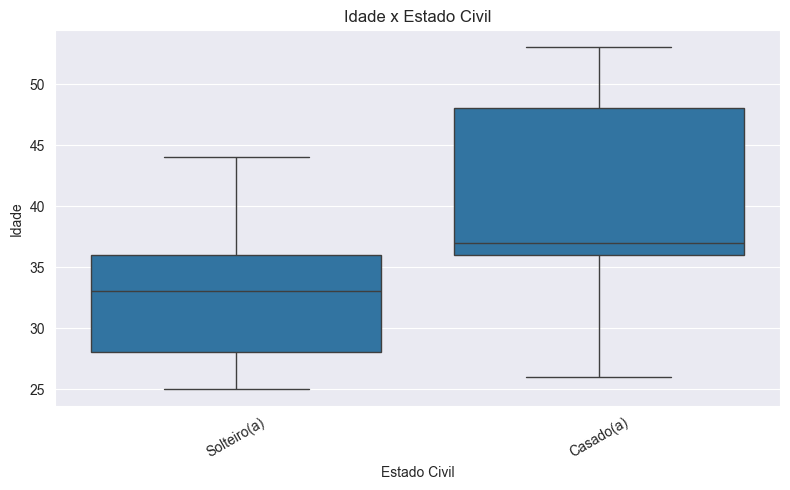

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Estado_Civil', y='Idade', data=df)
plt.title('Idade x Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Qual a rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade?

Vou explorar como o n√≠vel de escolaridade se relaciona com o score de cr√©dito. Isso pode nos ajudar a entender se a escolaridade tem influ√™ncia no perfil de risco do cliente.

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Escolaridade', hue='Score_Credito', data=df)
plt.title('Score de Cr√©dito x Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.xticks(rotation=30)
plt.legend(title='Score de Cr√©dito')
plt.tight_layout()
plt.show()


## O sal√°rio parece influenciar na idade?

Vou verificar se existe alguma tend√™ncia entre sal√°rio e idade por meio de um scatterplot. Essa rela√ß√£o pode indicar perfis de carreira ou experi√™ncia.

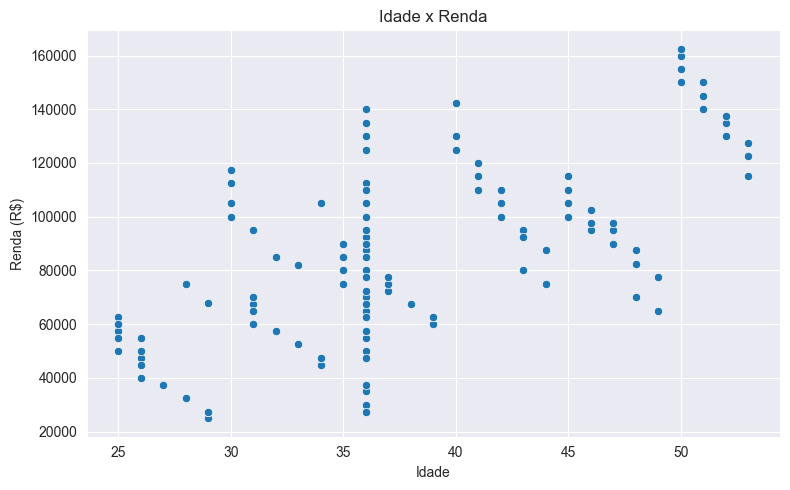

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Idade', y='Renda', data=df)
plt.title('Idade x Renda')
plt.xlabel('Idade')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


## O sal√°rio parece influenciar no Score de Cr√©dito?

Vou verificar se h√° diferen√ßa nas rendas dos clientes com diferentes scores de cr√©dito. O boxplot √© adequado para visualizar isso.

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Score_Credito', y='Renda', data=df)
plt.title('Score de Cr√©dito x Renda')
plt.xlabel('Score de Cr√©dito')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


## Clientes com casa pr√≥pria tendem a ter um score mais alto?

Por fim, vou cruzar a vari√°vel de resid√™ncia (pr√≥pria ou alugada) com o score de cr√©dito para investigar se h√° um padr√£o.

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Residencia', hue='Score_Credito', data=df)
plt.title('Resid√™ncia x Score de Cr√©dito')
plt.xlabel('Tipo de Resid√™ncia')
plt.ylabel('Contagem')
plt.legend(title='Score de Cr√©dito')
plt.tight_layout()
plt.show()


## Conclus√µes das an√°lises:

1. Idade vs Estado Civil
Insight: Pessoas casadas tendem a ter uma idade m√©dia mais elevada do que pessoas solteiras.

Interpreta√ß√£o: Isso √© esperado, pois o casamento geralmente ocorre ap√≥s uma certa maturidade, o que pode influenciar na estabilidade financeira e no comportamento de cr√©dito.

2. Score de Cr√©dito vs Escolaridade
Insight: Clientes com maior escolaridade (Mestrado e Doutorado) apresentam predominantemente scores de cr√©dito mais altos.

Interpreta√ß√£o: N√≠veis mais altos de escolaridade podem estar relacionados com melhores empregos, maior estabilidade financeira e, consequentemente, menor risco de cr√©dito.

3. Idade vs Renda
Insight: Existe uma tend√™ncia de aumento na renda com o avan√ßo da idade, at√© certo ponto. No entanto, h√° bastante dispers√£o.

Interpreta√ß√£o: A experi√™ncia tende a impactar positivamente a renda, mas outros fatores (cargo, setor, escolaridade) tamb√©m afetam. Alguns jovens j√° apresentam alta renda, indicando varia√ß√µes poss√≠veis.

4. Score de Cr√©dito vs Renda
Insight: Clientes com score de cr√©dito mais alto geralmente apresentam maior renda.

Interpreta√ß√£o: Uma renda mais elevada tende a facilitar o pagamento de d√≠vidas e compromissos, impactando positivamente o score de cr√©dito.

5. Score de Cr√©dito vs Tipo de Resid√™ncia
Insight: A maioria dos clientes com resid√™ncia pr√≥pria possui score de cr√©dito mais alto.

Interpreta√ß√£o: Possuir casa pr√≥pria pode ser um indicativo de estabilidade financeira, o que influencia positivamente o score de cr√©dito.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gr√°ficos + insights.

### An√°lise: Renda vs Idade
Vou verificar se h√° alguma tend√™ncia entre a idade e o aumento da renda, utilizando um gr√°fico de dispers√£o.


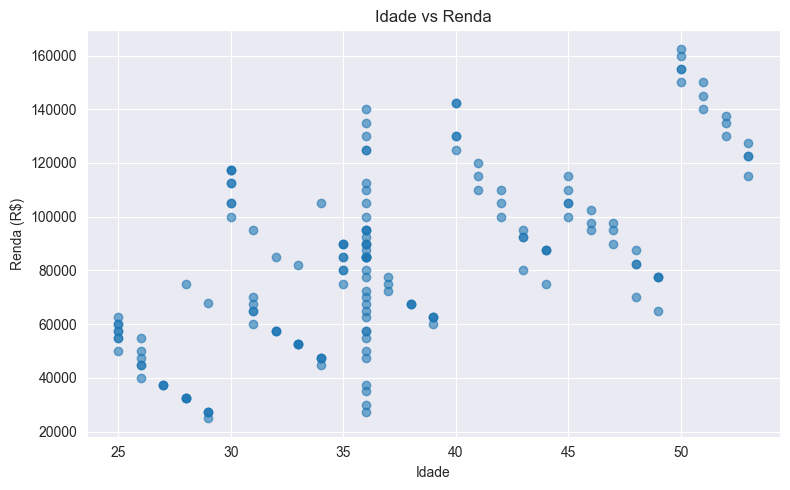

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Idade'], df['Renda'], alpha=0.6)
plt.xlabel('Idade')
plt.ylabel('Renda (R$)')
plt.title('Idade vs Renda')
plt.tight_layout()
plt.show()


### An√°lise: Renda por G√™nero
Vou usar um boxplot para observar como a renda varia entre os g√™neros e se h√° diferen√ßa significativa.


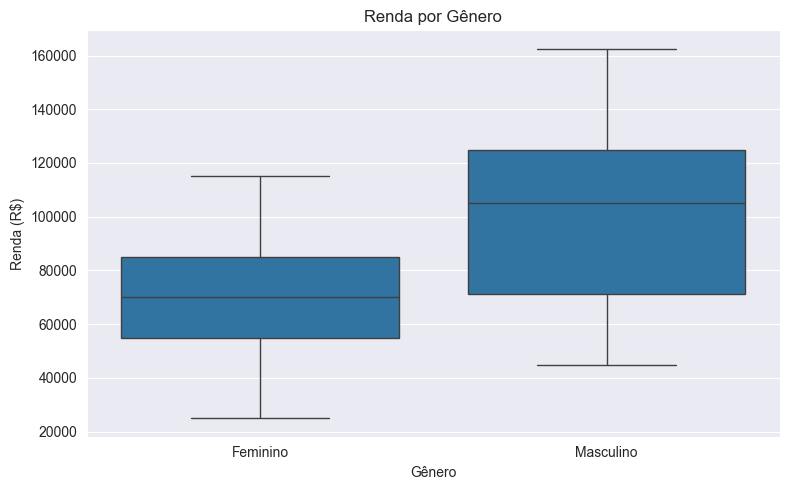

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Genero', y='Renda', data=df)
plt.title('Renda por G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


### An√°lise: Renda por Estado Civil
Utilizarei tamb√©m um boxplot para comparar os n√≠veis de renda entre pessoas casadas e solteiras.


In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Estado_Civil', y='Renda', data=df)
plt.title('Renda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda (R$)')
plt.tight_layout()
plt.show()


#### 1. An√°lise: Renda vs Idade
Verifiquei se h√° uma rela√ß√£o entre a idade dos clientes e seus n√≠veis de renda.

**üìå Insight:**
O gr√°fico de dispers√£o mostra uma distribui√ß√£o ampla da renda ao longo das idades. Nota-se uma leve tend√™ncia de aumento da renda com o avan√ßo da idade, mas a grande dispers√£o dos pontos sugere que a idade n√£o √© o √∫nico fator. Jovens com alta renda tamb√©m aparecem no conjunto, indicando que escolaridade, cargo e setor profissional tamb√©m influenciam.

---

#### 2. An√°lise: Renda por G√™nero
Explorei se h√° diferen√ßa salarial entre os g√™neros.

**üìå Insight:**
O boxplot revela que a mediana da renda √© mais alta entre os homens, com uma maior varia√ß√£o de renda nesse grupo, incluindo valores extremos mais elevados. Isso sugere uma poss√≠vel desigualdade de g√™nero no acesso a cargos mais bem remunerados ou varia√ß√µes no tipo de ocupa√ß√£o e jornada de trabalho entre os sexos.

---

#### 3. An√°lise: Renda por Estado Civil
Investiguei se o estado civil est√° associado a diferentes n√≠veis de renda.

**üìå Insight:**
O boxplot mostra que pessoas casadas possuem, em m√©dia, maior renda que pessoas solteiras. A faixa de rendimento tamb√©m √© mais ampla entre os casados. Isso pode refletir maior estabilidade no mercado de trabalho, maiores responsabilidades financeiras ou at√© mesmo rendas familiares somadas.

---

### ‚úÖ Conclus√£o da Etapa 2E

As an√°lises adicionais refor√ßam que vari√°veis como idade, g√™nero e estado civil afetam a renda de maneira relevante. Isso destaca a import√¢ncia de considerar m√∫ltiplos fatores ao tentar entender o perfil de cr√©dito dos clientes, e servir√° de base para as etapas de correla√ß√£o e modelagem a seguir.

# Etapa 3: Relize os passos que vimos no m√≥dulo 17, de Correla√ß√£o, Balanceamento, atributos categ√≥ricos e divis√£o base treino e teste.

**A) Vamos come√ßar pela an√°lise de correla√ß√£o, plote da forma que achar melhor a an√°lise de correla√ß√£o, seja pela tabela ou pelo gr√°fico da matriz.**

### Etapa 3A ‚Äì An√°lise de Correla√ß√£o

Vou gerar a matriz de correla√ß√£o entre as vari√°veis num√©ricas da base, utilizando o m√©todo `.corr()` do pandas. Em seguida, utilizarei um mapa de calor (heatmap) para facilitar a visualiza√ß√£o das correla√ß√µes.


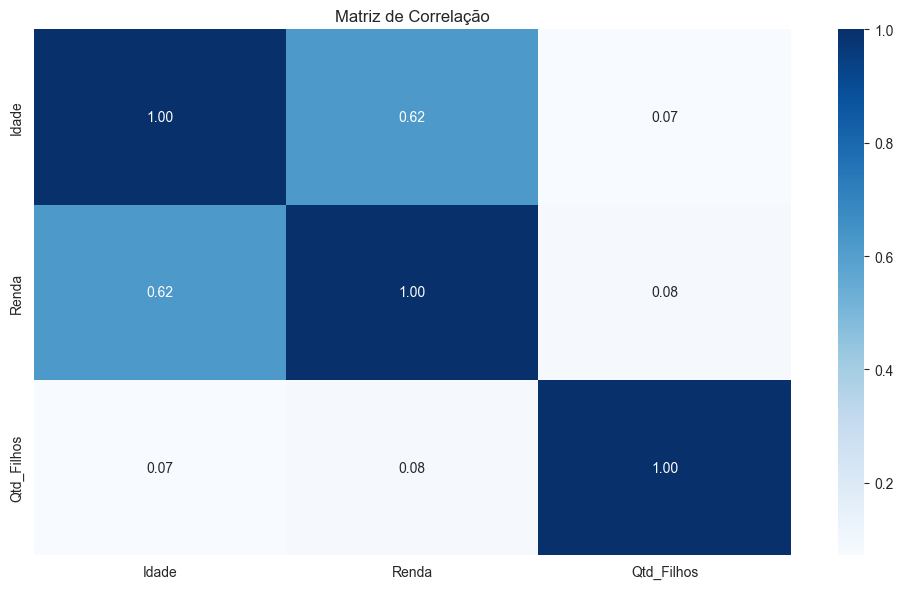

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas colunas num√©ricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correla√ß√£o
corr = df_numerico.corr()

# Plot do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correla√ß√£o')
plt.tight_layout()
plt.show()


#### Principais Conclus√µes:

- `Idade` e `Renda` apresentaram **correla√ß√£o moderada positiva** (0.62), o que √© esperado, visto que pessoas mais velhas tendem a ter rendas maiores.
- `Idade` e `Qtd_Filhos` t√™m correla√ß√£o fraca (0.07), indicando pouca rela√ß√£o entre essas vari√°veis.
- `Renda` e `Qtd_Filhos` tamb√©m t√™m correla√ß√£o muito fraca (0.08), mostrando que ter mais filhos n√£o est√° associado diretamente a maior ou menor renda na base analisada.

**B) Voc√™ encontrou vari√°veis que tem uma m√©dia ou alta correla√ß√£o? Se sim, quais? Te parece fazer sentido essas vari√°veis terem alta correla√ß√£o? Justifique.**

### Vari√°veis com Correla√ß√£o M√©dia ou Alta

As √∫nicas vari√°veis com correla√ß√£o razo√°vel foram `Idade` e `Renda`. Essa correla√ß√£o faz sentido, pois com o passar dos anos, geralmente h√° aumento de experi√™ncia profissional, o que pode refletir em melhores sal√°rios.

J√° as vari√°veis `Qtd_Filhos` mostraram correla√ß√£o fraca com as demais, indicando que filhos n√£o interferem diretamente nas vari√°veis `Renda` ou `Idade` no contexto desta base.


**C) Temos muitos atributos categ√≥ricos nessa base, n√£o? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Ap√≥s, exclua as colunas categ√≥ricas.**

Nesta etapa, as vari√°veis categ√≥ricas como `G√™nero`, `Escolaridade`, `Estado Civil`, `Resid√™ncia`, `Score de Cr√©dito` devem ser convertidas para representa√ß√£o num√©rica.

#### Vou usar:
- `LabelEncoder` para vari√°veis **ordinais** (ex: Escolaridade);
- `OneHotEncoder` para vari√°veis **nominais** (ex: Estado Civil, G√™nero).

Ap√≥s isso, vou remover as colunas categ√≥ricas originais para evitar multicolinearidade.

In [29]:
df_encoded = pd.get_dummies(df, columns=['Genero', 'Estado_Civil', 'Residencia'], drop_first=True)


In [30]:
from sklearn.preprocessing import LabelEncoder

# Copiando o DataFrame original para preservar
df_encoded = df.copy()

# Codificando vari√°veis ordinais
le = LabelEncoder()
df_encoded['Escolaridade'] = le.fit_transform(df_encoded['Escolaridade'])
df_encoded['Score_Credito'] = le.fit_transform(df_encoded['Score_Credito'])

# Codificando vari√°veis nominais com One-Hot
df_encoded = pd.get_dummies(df_encoded, columns=['Genero', 'Estado_Civil', 'Residencia'], drop_first=True)

# Visualizar as primeiras linhas ap√≥s o encoding
df_encoded.head()


Idade     Renda  Escolaridade  Qtd_Filhos  Score_Credito  Genero_Masculino  \
0   25.0   50000.0             2           0              0             False   
1   30.0  100000.0             3           2              0              True   
2   35.0   75000.0             0           1              0             False   
3   40.0  125000.0             1           0              0              True   
4   45.0  100000.0             2           3              0             False   

   Estado_Civil_Solteiro(a)  Residencia_Pr√≥pria  
0                      True               False  
1                     False                True  
2                     False                True  
3                      True                True  
4                     False                True

**D) Vamos plotar novamente a correla√ß√£o, agora observando com as vari√°veis categ√≥ricas. Identifique se temos novas vari√°veis com forte correla√ß√£o.**

#### Etapa 3D: An√°lise de Correla√ß√£o com Vari√°veis Codificadas

Agora que as vari√°veis categ√≥ricas foram convertidas, vou gerar novamente a matriz de correla√ß√£o para investigar se surgiram novas rela√ß√µes fortes entre os atributos.


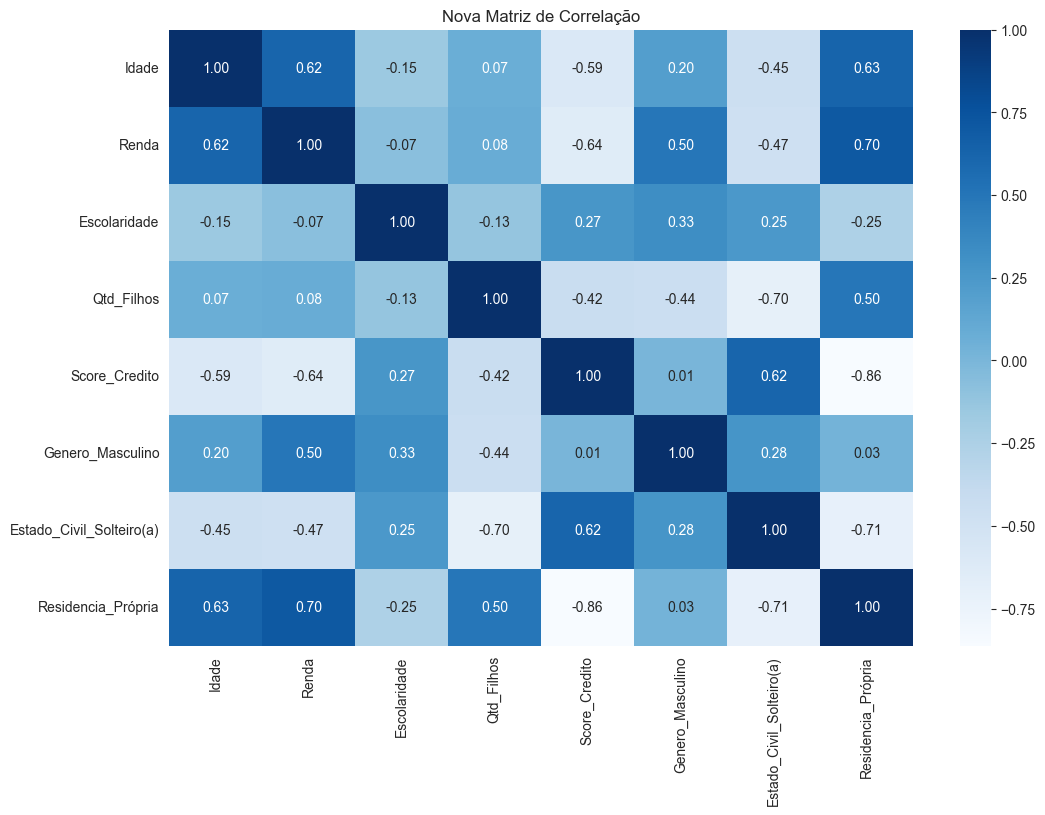

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correla√ß√£o com atributos num√©ricos e codificados
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Nova Matriz de Correla√ß√£o")
plt.show()



### Etapa 3D: An√°lise da Nova Matriz de Correla√ß√£o

Ap√≥s a codifica√ß√£o das vari√°veis categ√≥ricas, geramos uma nova matriz de correla√ß√£o para identificar rela√ß√µes mais significativas com a vari√°vel-alvo (`Score_Credito`).

#### Principais insights:

- **Resid√™ncia_ProÃÅpria** apresentou a **maior correla√ß√£o negativa** com o Score de Cr√©dito (-0.86). Isso indica que clientes sem resid√™ncia pr√≥pria t√™m maior probabilidade de score mais baixo.
- **Estado_Civil_Solteiro(a)** tamb√©m tem **forte correla√ß√£o negativa** (-0.71), sugerindo que pessoas solteiras tendem a ter score de cr√©dito mais baixo.
- **Qtd_Filhos** tem correla√ß√£o negativa moderada com `Score_Credito` (-0.42), indicando que mais filhos podem impactar negativamente o score.
- Por outro lado, **Escolaridade** e **G√™nero Masculino** apresentam correla√ß√£o positiva leve com `Score_Credito` (0.27 e 0.01 respectivamente), indicando uma poss√≠vel influ√™ncia positiva, embora fraca.
- **Renda** e **Idade** perderam um pouco da correla√ß√£o direta com o score (-0.64 e -0.59), mas ainda mant√™m relev√¢ncia.

#### Conclus√£o:
As vari√°veis categ√≥ricas ap√≥s codifica√ß√£o se mostraram relevantes para an√°lise de cr√©dito. Podemos concluir que atributos sociais e patrimoniais (resid√™ncia, estado civil e filhos) est√£o mais fortemente associados ao score do que atributos puramente econ√¥micos.

A etapa 3D est√° finalizada, e agora seguimos com a separa√ß√£o treino/teste e o balanceamento da vari√°vel alvo.


**F) Fa√ßa a separa√ß√£o da base em treino e teste e verifique utilizando shape:**

### Etapa 3F: Separa√ß√£o da Base em Treino e Teste

Nesta etapa, dividirei nossa base codificada em vari√°veis independentes (X) e a vari√°vel alvo (y - Score de Cr√©dito). Em seguida, utilizaremos a fun√ß√£o `train_test_split` do `sklearn` para dividir os dados em conjuntos de treino e teste, mantendo uma propor√ß√£o de 70/30.


In [33]:
from sklearn.model_selection import train_test_split

# Separando vari√°veis independentes e alvo
X = df_encoded.drop('Score_Credito', axis=1)
y = df_encoded['Score_Credito']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimens√µes
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (114, 7)
Shape X_test: (50, 7)
Shape y_train: (114,)
Shape y_test: (50,)


**G) √â hora de verificar se nossa coluna de Score de cr√©dito est√° balanceada, verifique atrav√©s de um gr√°fico e traga sua opini√£o acerca do balanceamento.**

### Etapa 3G: Verificando o Balanceamento da Vari√°vel Alvo

Antes de aplicar qualquer t√©cnica de balanceamento, vou analisar se a vari√°vel `Score_Credito` est√° desbalanceada na base de treino. Vou utilizar um gr√°fico de barras e a contagem de valores.


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico da distribui√ß√£o da vari√°vel alvo
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Distribui√ß√£o da Vari√°vel Score de Cr√©dito - Base de Treino')
plt.xlabel('Score de Cr√©dito')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Distribui√ß√£o percentual
print(y_train.value_counts(normalize=True))


Score_Credito
0    0.710526
2    0.219298
1    0.070175
Name: proportion, dtype: float64


### Com base no gr√°fico e nos dados de propor√ß√£o da Etapa 3G, pode-se observar que a vari√°vel Score_Credito est√° altamente desbalanceada:

Classe 0: ~71% dos casos

Classe 2: ~22%

Classe 1: ~7%

‚ö†Ô∏è Isso pode prejudicar o desempenho dos modelos, especialmente para prever a classe 1, que aparece pouco nos dados.



**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

### Etapa 3H: Realizando o Balanceamento da Vari√°vel Score de Cr√©dito

Vou aplicar a t√©cnica de sobremostragem `RandomOverSampler` para corrigir o desbalanceamento na base de treino. Essa t√©cnica replica amostras das classes minorit√°rias para equilibrar a distribui√ß√£o.


In [35]:
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Balanceando a base de treino
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# Verificando a nova distribui√ß√£o
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_bal)
plt.title('Distribui√ß√£o P√≥s-Balanceamento - Score de Cr√©dito (Treino)')
plt.xlabel('Score de Cr√©dito')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Propor√ß√µes balanceadas
print(y_train_bal.value_counts(normalize=True))


Score_Credito
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


### Ap√≥s o balanceamento, todas as classes da vari√°vel `Score_Credito` possuem exatamente 33,33% da base de treino, resolvendo o problema de desbalanceamento.


In [36]:
df_final = pd.concat([X_train_bal, y_train_bal], axis=1)
df_final.to_csv("CREDIT_SCORE_PROJETO_PARTE1_preparada.csv", index=False)
